# Predicting CO2 Emission using  Simple Linear Regression

### Importing Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

### Reading dataset

In [2]:
df=pd.read_csv("FuelConsumption.csv",usecols=["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","CO2EMISSIONS"])
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1067 non-null   int64  
 2   FUELCONSUMPTION_CITY  1067 non-null   float64
 3   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 33.4 KB


In [4]:
df.isnull().sum()

ENGINESIZE              0
CYLINDERS               0
FUELCONSUMPTION_CITY    0
CO2EMISSIONS            0
dtype: int64

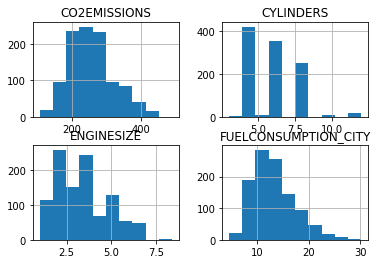

In [5]:
df.hist()
plt.show()

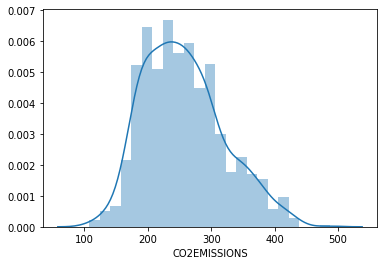

In [6]:
import seaborn as sns
sns.distplot(df.CO2EMISSIONS)

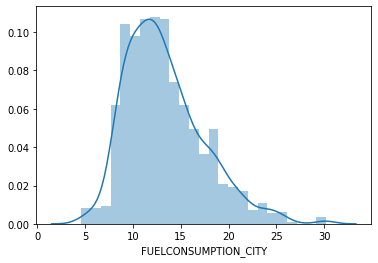

In [7]:
sns.distplot(df.FUELCONSUMPTION_CITY)

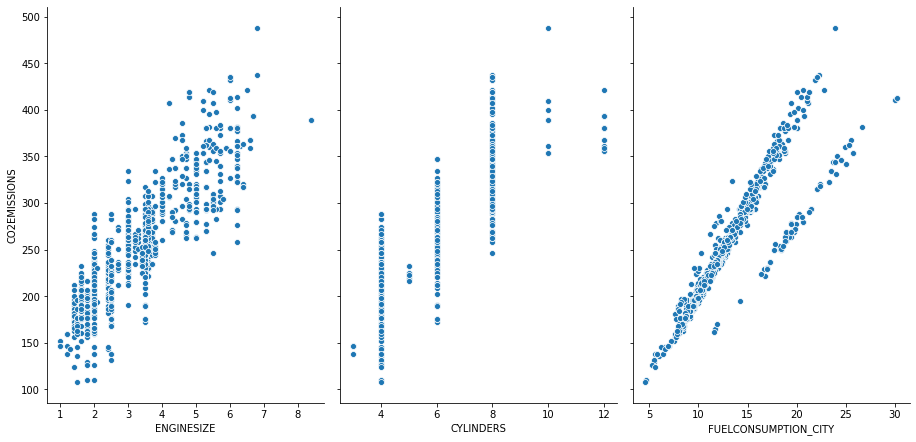

In [8]:
sns.pairplot(df,x_vars=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY'],y_vars=['CO2EMISSIONS'],aspect=0.7,height=6)

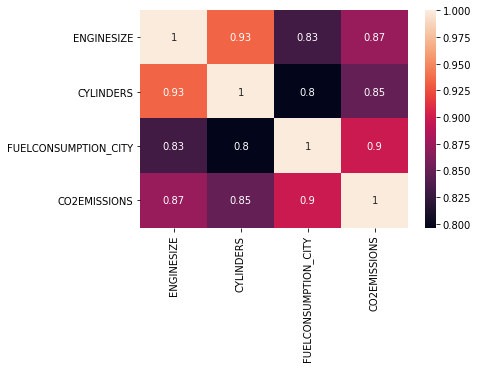

In [9]:
sns.heatmap(df.corr(),annot=True)

## Simple linear regression model Creation

In [18]:
X = df[['ENGINESIZE']] 
y = df[["CO2EMISSIONS"]]

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print(model.intercept_)
print(model.coef_)

[124.23458595]
[[39.54874496]]


In [22]:
pred = model.predict(X_test)

In [23]:
pred[:10]

array([[242.88082083],
       [179.60282889],
       [203.33207587],
       [203.33207587],
       [306.15881277],
       [242.88082083],
       [203.33207587],
       [195.42232688],
       [242.88082083],
       [219.15157386]])

## Model Evaluation Metrics

In [24]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,pred))
print(metrics.mean_squared_error(y_test,pred))
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

23.183704964940226
947.2869872487787
30.778027669894293


In [25]:
from sklearn.metrics import r2_score

print("r^2 score:",r2_score(y_test,pred))

r^2 score: 0.7633265438534859
